In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
filename = "/Users/t866229/input/prophet/TSLA_5yr.csv"
data = pd.read_csv(filename) 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2.524000e+03
mean,211.683011,215.861672,207.402056,211.806878,211.806878,6.065569e+06
std,171.959696,176.322396,167.569397,172.331564,172.331564,5.656758e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,35.079999,35.587498,34.535001,35.094999,35.094999,2.034125e+06
50%,217.855004,221.479996,214.290001,218.190002,218.190002,4.796600e+06
75%,283.597488,289.192504,278.707497,284.502495,284.502495,7.848150e+06
max,1405.010010,1429.500000,1336.709961,1389.859985,1389.859985,6.093880e+07


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

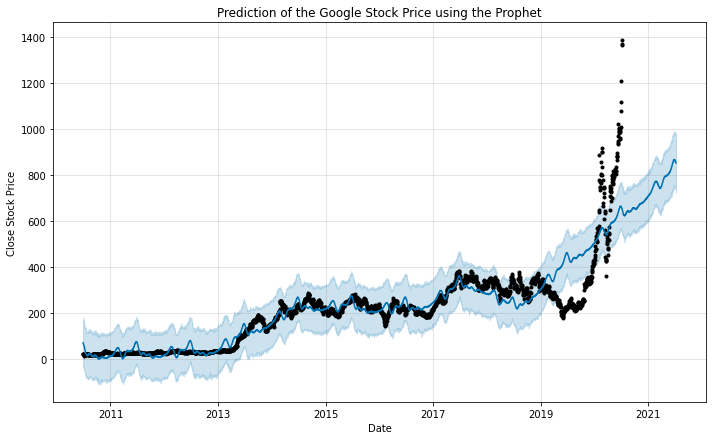

In [5]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title(filename)
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

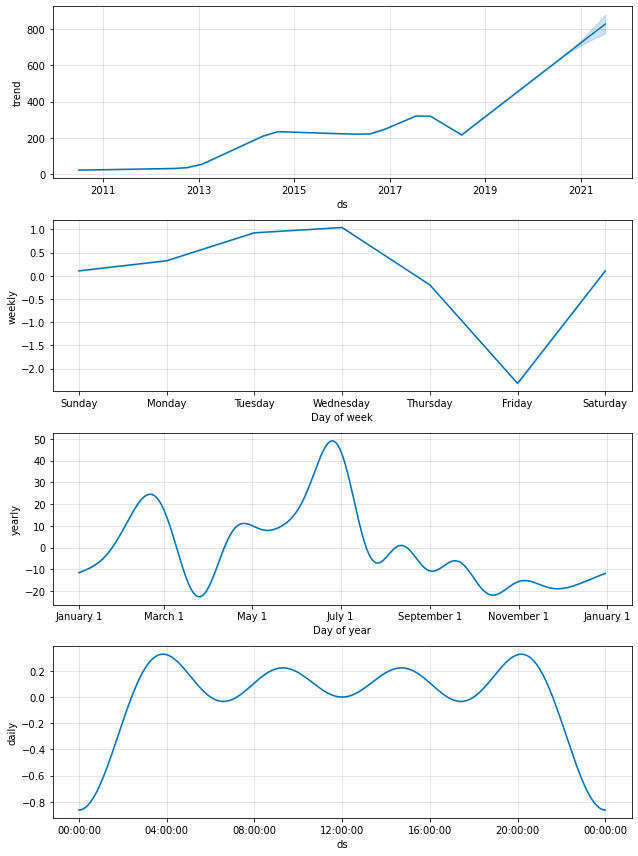

In [6]:
m.plot_components(prediction)
plt.show()